In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.mymods import correlation_info, model_summary

In [3]:
df = pd.read_json('../../src/data/combined_onehot.json')

['SqFtTotLiving',
 'SqFtOpenPorch',
 'FinBasementGrade',
 'WfntLocation_6.0',
 'WfntLocation_7.0',
 'WfntFootage',
 'WfntLocation_3.0',
 'WfntLocation_8.0',
 'WfntLocation_5.0']

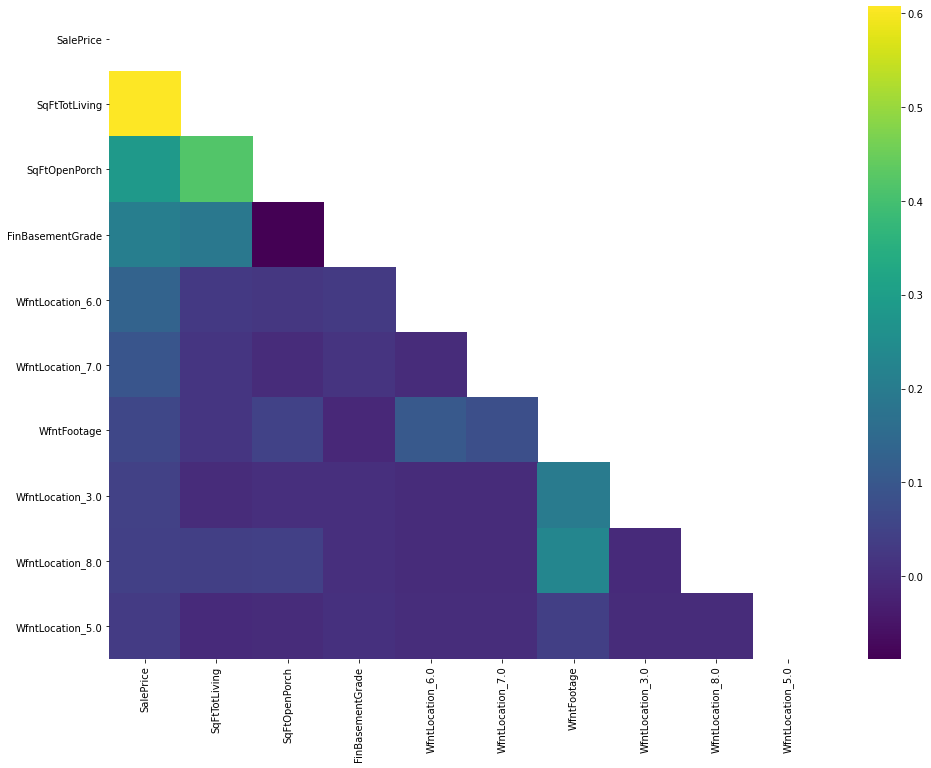

In [4]:
top_corr, graph = correlation_info(df, 'SalePrice',.01)
top_corr

In [5]:
summary, third_model = model_summary(df,'SalePrice', top_corr)
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                          1.722e+04
Date:                Sun, 04 Oct 2020   Prob (F-statistic):                        0.00
Time:                        17:49:22   Log-Likelihood:                     -3.6602e+05
No. Observations:               25903   AIC:                                  7.321e+05
Df Residuals:                   25894   BIC:                                  7.321e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
SqFtTotLiving      318.8279      1.431    222.727      0.000     316.022     321.634
SqFtOpenPorch      125.3265     19.153      6.544      0.000      87.786     162.867
FinBasementGrade  1.392e+04    591.052     23.559      0.000    1.28e+04    1.51e+04
WfntLocation_6.0      1e+06   4.64e+04     21.573      0.000    9.09e+05    1.09e+06
WfntLocation_7.0  1.238e+06   7.45e+04     16.621      0.000    1.09e+06    1.38e+06
WfntFootage        334.4771    101.484      3.296      0.001     135.562     533.392
WfntLocation_3.0  3.566e+05   3.73e+04      9.572      0.000    2.84e+05     4.3e+05
WfntLocation_8.0  9.215e+04   3.11e+04      2.959      0.003    3.11e+04    1.53e+05
WfntLocation_5.0  8.805e+05   1.25e+05      7.018      0.000    6.35e+05    1.13e+06
==============================================================================
Omnibus:                     5790.612   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25422.301
Skew:                           1.035   Prob(JB):                         0.00
Kurtosis:                       7.390   Cond. No.                     1.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linearity

In [112]:
rainbow_statistic, rainbow_p_value = linear_rainbow(third_model)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0023206849327422
Rainbow p-value: 0.4475429191934796


### Normality 

jarque_bera: 25422.30053352313
jarque_bera: 0.0


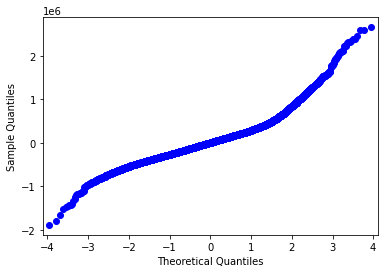

In [114]:
jarque_bera = list(sms.jarque_bera(third_model.resid))[0]
Prob_JB =list(sms.jarque_bera(third_model.resid))[1]
print(f'jarque_bera: {jarque_bera }')
print(f'jarque_bera: {Prob_JB}')

third_model_resids = third_model.resid
sm.qqplot(third_model_resids);

### Homoscadasticity

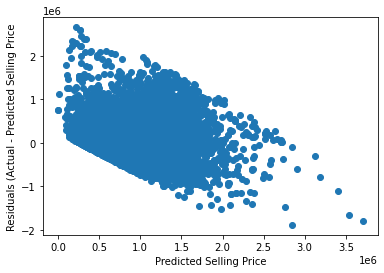

In [118]:
y_hat = third_model.predict()

fig, ax = plt.subplots()
ax.set(xlabel="Predicted Selling Price",
        ylabel="Residuals (Actual - Predicted Selling Price")
ax.scatter(y_hat, third_model_resids);

In [122]:
rows = df[top_corr].values

vif_df_third = pd.DataFrame()
vif_df_third["VIF"] = [variance_inflation_factor(rows, i) for i in range(len(top_corr))]
vif_df_third["feature"] = top_corr

vif_df_third

,VIF,feature
0,2.668034,SqFtTotLiving
1,1.724453,SqFtOpenPorch
2,1.749981,FinBasementGrade
3,1.016200,WfntLocation_6.0
4,1.008621,WfntLocation_7.0
5,1.132020,WfntFootage
6,1.047656,WfntLocation_3.0
7,1.067224,WfntLocation_8.0
8,1.002226,WfntLocation_5.0
